In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
X = list()
y = list()
path = ['./img_class/', './img_ok/', './img_bad/', './img_empty/']
for p in path:
    for filename in os.listdir(p):
        img = cv2.imread(p + filename)
        X.append(img)
        if 'class' in p:
            y.append([1.0, 0.0, 0.0, 0.0])
        elif 'ok' in p:
            y.append([0.0, 1.0, 0.0, 0.0])
        elif 'bad' in p:
            y.append([0.0, 0.0, 1.0, 0.0])
        elif 'empty' in p:
            y.append([0.0, 0.0, 0.0, 1.0])

In [3]:
X = np.array(X)
X = X.astype('float32') / 255
y = np.array(y)
print(y.shape, X.shape)

(2800, 4) (2800, 144, 192, 3)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [5]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2100, 144, 192, 3) (700, 144, 192, 3) (2100, 4) (700, 4)


In [8]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=[144, 192, 3]),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding="same"),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3,3), activation='relu', padding="same"),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(150, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dense(70, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dense(20, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dense(4, activation='softmax', kernel_initializer="he_normal"),
])

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_train, y_train))

Epoch 1/15
66/66 [==============================] - 10s 103ms/step - loss: 1.3375 - accuracy: 0.5157 - val_loss: 1.2865 - val_accuracy: 0.5414

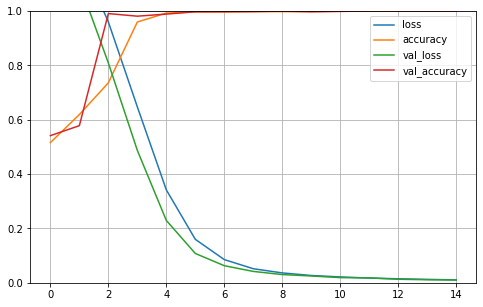

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
res = model.predict(X_test)

In [12]:
res = res.round()

In [13]:
a = accuracy_score(y_test, res)
print(f"accuracy_score {a}")

accuracy_score 1.0


In [14]:
model.save("gestures_model.h5")